In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [24]:
df = pd.read_csv('/home/miserver10/workspace_vscode/datasets/CO2 data/CO2 Emissions_Canada.csv')
description = pd.read_csv('/home/miserver10/workspace_vscode/datasets/CO2 data/Data Description.csv')

In [25]:
description

,Understanding the Data,Unnamed: 1
0,Model,4WD/4X4 = Four-wheel drive
1,NaN,AWD = All-wheel drive
2,NaN,FFV = Flexible-fuel vehicle
3,NaN,SWB = Short wheelbase
4,NaN,LWB = Long wheelbase
5,NaN,EWB = Extended wheelbase
6,Transmission,A = automatic
7,NaN,AM = automated manual
8,NaN,AS = automatic with select shift
9,NaN,AV = continuously variable


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [27]:
df=df.rename(columns = {'Engine Size(L)':'eng_size','Fuel Type':'fuel_type',
                            'Make':'make','Model':'model','Cylinders':'cylinders',
                            'Vehicle Class':'vehicle_class',
                            'Transmission':'trans',
                            'Fuel Consumption City (L/100 km)':'cons_city',
                            'Fuel Consumption Hwy (L/100 km)':'cons_hwy',
                            'Fuel Consumption Comb (L/100 km)':'cons_comb',
                            'Fuel Consumption Comb (mpg)':'cons_mpg',
                            'CO2 Emissions(g/km)':'emissions'})

In [28]:
df.columns

Index(['make', 'model', 'vehicle_class', 'eng_size', 'cylinders', 'trans',
       'fuel_type', 'cons_city', 'cons_hwy', 'cons_comb', 'cons_mpg',
       'emissions'],
      dtype='object')

In [29]:
# 제조사 수 확인
df['make'].nunique()

42

In [30]:
# 제조사별 차량 수 확인
df['make'].value_counts().nlargest()
# Ford, Chevrolet, BMW가 가장 많은 비율을 차지

make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
Name: count, dtype: int64

In [31]:
# 연료 유형별 차량 수 확인
df['fuel_type'].value_counts()
# Regular Gasoline(X)와 Premium Gasoline(Z) 연료 유형이 가장 많은 비율을 차지

fuel_type
X    3637
Z    3202
E     370
D     175
N       1
Name: count, dtype: int64

In [32]:
# 변속기 유형별 차량 수 확인
df['trans'].value_counts()

trans
AS6     1324
AS8     1211
M6       901
A6       789
A8       490
AM7      445
A9       339
AS7      319
AV       295
M5       193
AS10     168
AM6      132
AV7      118
AV6      113
M7        91
A5        84
AS9       77
A4        65
AM8       62
A7        53
AV8       39
A10       31
AS5       26
AV10      11
AM5        4
AM9        3
AS4        2
Name: count, dtype: int64

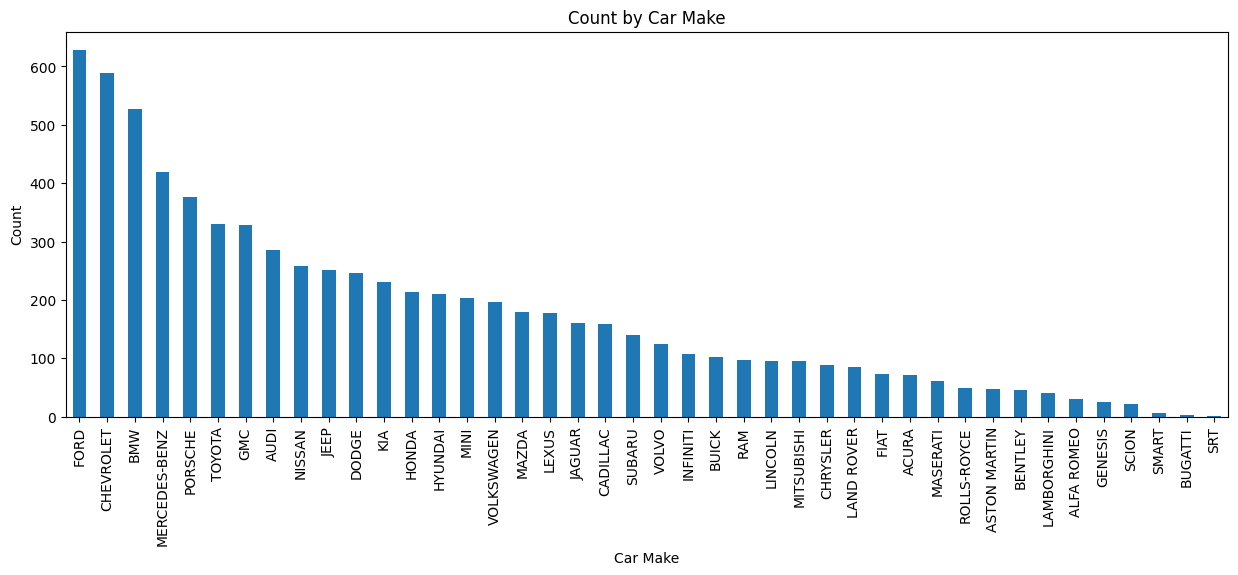

In [33]:
# 제조사별 차량 수 시각화
plt.figure(figsize=(15, 5))  # Adjust the figure size if needed
df["make"].value_counts(ascending=False).plot(kind='bar')
plt.title("Count by Car Make")
plt.xlabel("Car Make")
plt.ylabel("Count")
plt.show()

In [34]:
# 제조사 별 평균 CO2 배출량
df.groupby('make')['emissions'].mean().nlargest()
# Identifying which vehicle make has highest mean emission. Top 5 vehciles with highest mean emission below

make
BUGATTI        522.000000
LAMBORGHINI    400.780488
SRT            389.000000
ROLLS-ROYCE    388.480000
BENTLEY        362.934783
Name: emissions, dtype: float64

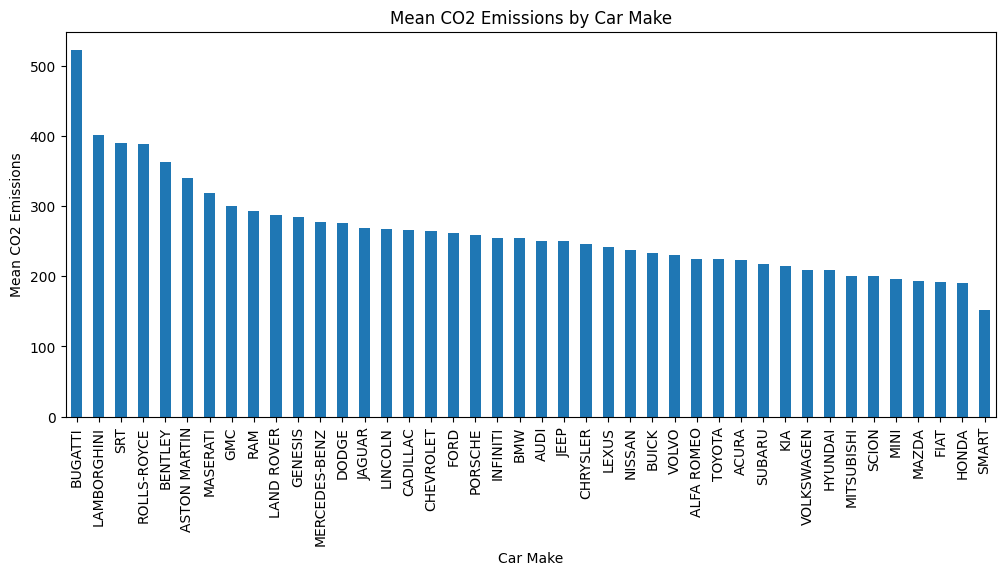

In [35]:
# 제조사별 평균 CO2 배출량 시각화
plt.figure(figsize=(12, 5))  # Adjust the figure size if needed
df.groupby("make")["emissions"].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Mean CO2 Emissions by Car Make")
plt.xlabel("Car Make")
plt.ylabel("Mean CO2 Emissions")
plt.show()

In [36]:
# 제조사 및 모델별 평균 CO2 배출량 상위 5개
df.groupby(["make","model"])["emissions"].mean().nlargest(5)

make         model             
BUGATTI      CHIRON                522.0
             Chiron                522.0
LAMBORGHINI  Aventador Roadster    493.0
FORD         E350 WAGON            488.0
LAMBORGHINI  Aventador Coupe       486.0
Name: emissions, dtype: float64

In [37]:
# 변속기 유형별 평균 CO2 배출량 상위 5개
df.groupby('trans')['emissions'].mean().nlargest()

trans
A10    315.161290
A7     312.716981
A5     298.630952
A4     292.953846
A8     283.908163
Name: emissions, dtype: float64

In [38]:
# 제조사, 모델 및 변속기 유형별 평균 CO2 배출량 상위 5개
df.groupby(["make", 'model', "trans"])["emissions"].max().nlargest(5)

make         model               trans
BUGATTI      CHIRON              AM7      522
             Chiron              AM7      522
LAMBORGHINI  Aventador Roadster  AM7      493
FORD         E350 WAGON          A5       488
LAMBORGHINI  Aventador Coupe     AM7      487
Name: emissions, dtype: int64

In [39]:
# 차량 클래스별 차량 수
df['vehicle_class'].value_counts()

vehicle_class
SUV - SMALL                 1217
MID-SIZE                    1133
COMPACT                     1022
SUV - STANDARD               735
FULL-SIZE                    639
SUBCOMPACT                   606
PICKUP TRUCK - STANDARD      538
TWO-SEATER                   460
MINICOMPACT                  326
STATION WAGON - SMALL        252
PICKUP TRUCK - SMALL         159
MINIVAN                       80
SPECIAL PURPOSE VEHICLE       77
VAN - PASSENGER               66
STATION WAGON - MID-SIZE      53
VAN - CARGO                   22
Name: count, dtype: int64

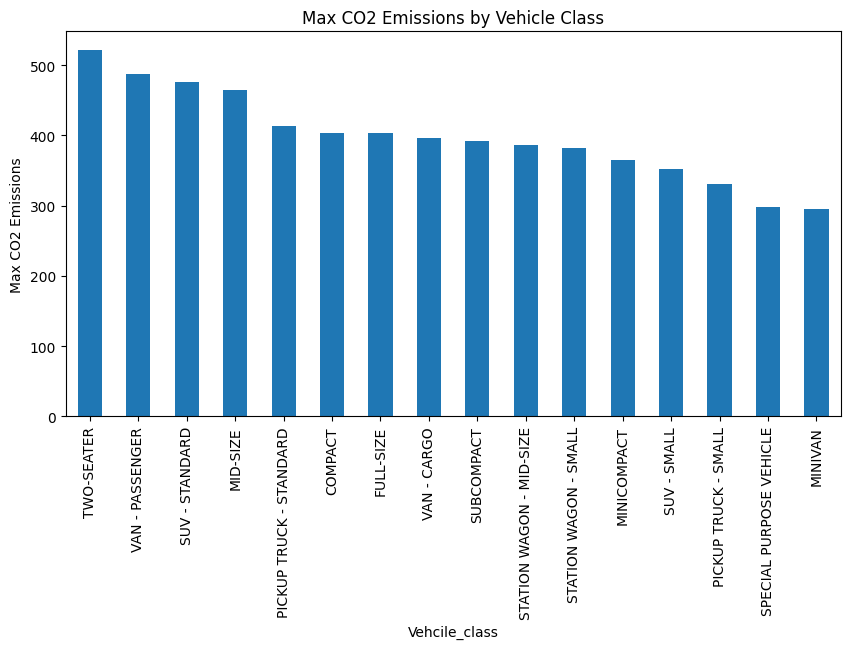

In [40]:
# 차량 클래스별 최대 CO2 배출량 시각화
plt.figure(figsize=(10, 5))  # Adjust the figure size if needed
df.groupby("vehicle_class")["emissions"].max().sort_values(ascending=False).plot(kind='bar')
plt.title("Max CO2 Emissions by Vehicle Class")
plt.xlabel("Vehcile_class")
plt.ylabel("Max CO2 Emissions")
plt.show()

In [41]:
# 제조사 및 연료 유형별 최대 CO2 배출량 상위 5개
df.groupby(['make', 'fuel_type'])['emissions'].max().nlargest()

make           fuel_type
BUGATTI        Z            522
LAMBORGHINI    Z            493
FORD           X            488
MERCEDES-BENZ  Z            476
BENTLEY        Z            465
Name: emissions, dtype: int64

In [42]:
# 연료 유형별 최대 CO2 배출량 상위 5개
df.groupby("fuel_type")["emissions"].max().nlargest()

fuel_type
Z    522
X    488
E    418
D    326
N    213
Name: emissions, dtype: int64

<Axes: xlabel='cons_comb', ylabel='emissions'>

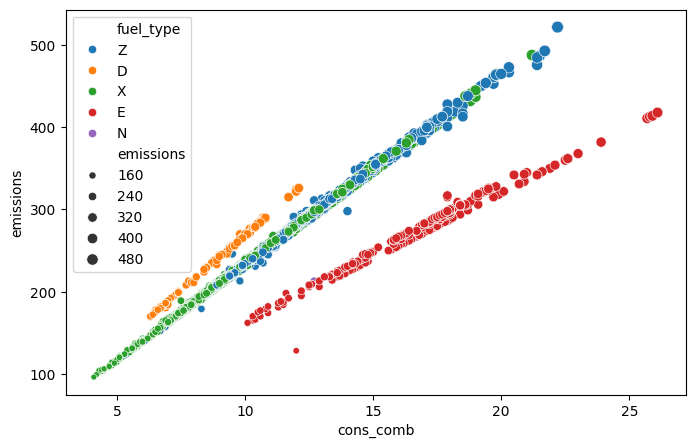

In [43]:
# 연료 유형에 따른 연료 효율성 및 CO2 배출량 시각화
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='cons_comb',y='emissions',hue='fuel_type',size='emissions')

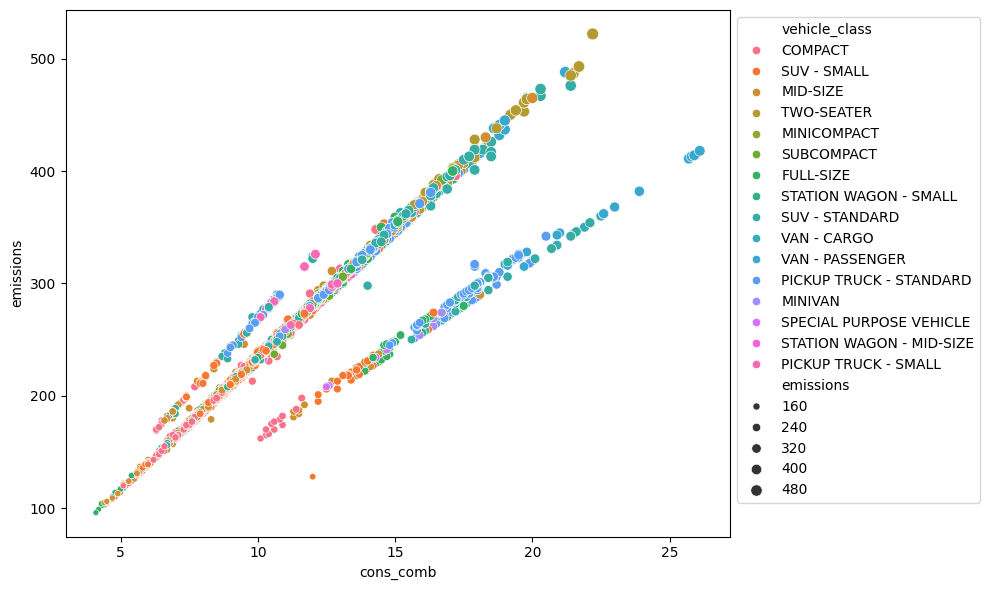

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='cons_comb',y='emissions',hue='vehicle_class',size='emissions')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

In [45]:
# 연료 유형(fuel_type) 더미 변수 생성
df= pd.get_dummies(df,columns=['fuel_type'])

In [46]:
# 변속기 유형(trans) 더미 변수 생성
df= pd.get_dummies(df,columns=['trans'])

In [47]:
# 데이터 확인 과정 코드

- df['fuel_type'].value_counts()
- df['trans'].value_counts()

를 통해 개수가 적은, 배출량에 큰 영향을 미치지 않는 비효과적인 일부 예측 변수 제거

In [48]:
# 불필요한 열 제거
df= df.drop(['make','model','vehicle_class','cons_city','cons_hwy',
                    'fuel_type_N','fuel_type_E','fuel_type_D','trans_M7',
                    'trans_A5','trans_AS9','trans_A4','trans_AM8',
                    'trans_A7','trans_AV8',
                    'trans_A10','trans_AS5','trans_AV10',
                    'trans_AM5','trans_AM9','trans_AS4'],axis=1)

In [49]:
df.dtypes

eng_size       float64
cylinders        int64
cons_comb      float64
cons_mpg         int64
emissions        int64
fuel_type_X       bool
fuel_type_Z       bool
trans_A6          bool
trans_A8          bool
trans_A9          bool
trans_AM6         bool
trans_AM7         bool
trans_AS10        bool
trans_AS6         bool
trans_AS7         bool
trans_AS8         bool
trans_AV          bool
trans_AV6         bool
trans_AV7         bool
trans_M5          bool
trans_M6          bool
dtype: object

In [50]:
X = df.loc[:, df.columns!= 'emissions']
y = df.loc[:, df.columns== 'emissions']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [52]:
regressor=LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_train, y_train)

0.9324388296251351

In [53]:
regressor.score(X_test, y_test)

0.925444111641239

In [54]:
y_pred = regressor.predict(X_test)

In [55]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model-R2 is %.2f" %Accuracy)

 Accuracy of the model-R2 is 92.54


<Axes: xlabel='emissions'>

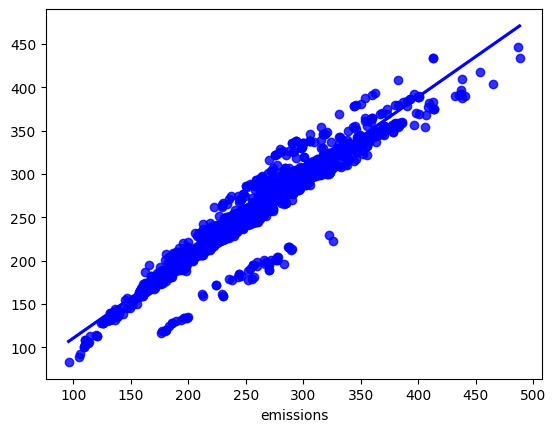

In [56]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='blue')

In [57]:
ridge_reg = Ridge(alpha = 5)
ridge_reg.fit(X_train,y_train)

Ridge(alpha=5)

In [58]:
ridge_reg.score(X_train,y_train)

0.9323902256338086

In [59]:
ridge_reg.score(X_test,y_test)

0.9257033697750909

In [60]:
la_reg = Lasso(alpha=1.0, max_iter=10000,random_state=42)
la_reg.fit(X_train,y_train)

Lasso(max_iter=10000, random_state=42)

In [61]:
la_reg.score(X_train,y_train)

0.9059729768163698

In [62]:
la_reg.score(X_test,y_test)

0.9021414901841579

In [63]:
scores = {
    "Linear Regression": regressor.score(X_test, y_test),
    "Ridge": ridge_reg.score(X_test,y_test),
    "Lasso": la_reg.score(X_test,y_test)
}

scores_df = pd.DataFrame(scores, index=["R^2 Score"])

# transpose the df to have models as rows and metrics as columns
scores_df = scores_df.T

print(scores_df)

                   R^2 Score
Linear Regression   0.925444
Ridge               0.925703
Lasso               0.902141
